In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys
sys.path.append('../../../')
import classify
import utils
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("bright")

/Users/cankoc/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
CALIBRATION_FILE = "../../../calibration/out/C.mat"
TEST_FOLDER = "../../../experiment_data/blue_feet/"
TEST_FILE = TEST_FOLDER + "/4/2016.10.02_20.40.19_trial_imudata.txt"

DATA_FOLDER ="/Users/Can/biomimetics/veloplot/experiment_data/blue_feet/mast/"
CTL_FILES = DATA_FOLDER + "0/" + "*.csv"  # No touch data
ACT_FILES = DATA_FOLDER + "1/" + "*.csv"  # Touch data

In [3]:
test_data, df, df_segs = classify.get_test_data(TEST_FILE, CALIBRATION_FILE)

In [4]:
# ylabels = {
#     "AX": "Acceleration m/s^2",
#     "AY": "Acceleration m/s^2",
#     "AZ": "Acceleration m/s^2",
#     "A_mag": "Acceleration m/s^2",
#     "Fx": "Force (N)",
#     "Fy": "Force (N)",
#     "Fz": "Force (N)",
#     "F_mag": "Force (N)",
#     "Mx": "Moment (mN * m)",
#     "My": "Moment (mN * m)",
#     "Mz": "Moment (mN * m)",
#     "M_mag": "Moment (mN * m)",
#     "TorqueL": r'$\tau$ (mN * m)',
#     "TorqueR": r'$\tau$ (mN * m)',
#     "Right Leg Pos": "Leg position (rad)",
#     "Left Leg Pos": "Leg position (rad)",
#     "RBEMF": r'$\frac{kg * m^2}{A * s^2}$',
#     "LBEMF": r'$\frac{kg * m^2}{A * s^2}$',
#     "VMotorR": "VMotor",
#     "VMotorL": "VMotor",
#     "PowerR": "Power",
#     "PowerL": "Power",
#     "GyroX": "degrees/s",
#     "GyroY": "degrees/s",
#     "GyroZ": "degrees/s",
#     "Gyro_mag": "degrees/s",
#     "Energy": "Energy",
#     "VBatt": "VBatt",
#     "AngleZ": "Anglez"
# }


In [13]:
# color_intervals = []
# color_intervals.append((7.0, 11.0))
# xfont = {'fontname':'Times New Roman'}
# columns=[["Fx", "Fy", "Fz"],['Left Leg Pos', 'Right Leg Pos'],['PowerR', 'PowerL']]
# display=True
# save_figure=False
# output_dir="out/"
# output_filename="visualized.png"
# figsize=None
# if figsize:
#     figure, axarr = plt.subplots(len(columns), figsize=figsize)
#     # print "here"
# else:
#     # Use the default figsize specified by rcparams.
#     figure, axarr = plt.subplots(len(columns))
    

# ax = axarr[0] if len(columns) > 1 else axarr

# if type(columns[0]) == list:
#     for col in columns[0]:
#         ax.plot(df["time"], df[col], label=col)
#         ax.set_ylabel(ylabels[col],fontdict=xfont, fontsize=24)
#         # ax.set_title(titles[col])

# else:
#     ax.plot(df["time"], df[columns[0]], label=columns[0])
#     ax.set_ylabel(ylabels[columns[0]],fontdict=xfont, fontsize=24)
#     # ax.set_title(titles[columns[i]])
# for el in color_intervals:
#     ax.axvspan(el[0], el[1], facecolor='y', alpha=0.5)
# #####################################################

# if type(columns[1]) == list:
#     for col in columns[1]:
#         ax.plot(df["time"], df[col], label=col)
#         ax.set_ylabel(ylabels[col],fontdict=xfont, fontsize=24)
#         # ax.set_title(titles[col])

# else:
#     ax.plot(df["time"], df[columns[1]], label=columns[1])
#     ax.set_ylabel(ylabels[columns[1]],fontdict=xfont, fontsize=24)
#     # ax.set_title(titles[columns[i]])
# for el in color_intervals:
#     ax.axvspan(el[0], el[1], facecolor='y', alpha=0.5)



# ax.set_xlim([0, df["time"].max()])
# ax.set_xlabel("Time (s)",fontdict=xfont, fontsize=24)
# ax.legend(bbox_to_anchor=(1.28, 1.05),fontsize=20)
# ax.tick_params(axis='both', which='major', labelsize=20)



In [14]:
# color_intervals = []
# color_intervals.append((7.0, 11.0))
# xfont = {'fontname':'Times New Roman'}
# utils.plot_columns(
#     df,
#     columns=[["Fx", "Fy", "Fz"],['Left Leg Pos', 'Right Leg Pos'],['PowerR', 'PowerL']],
#     display=True,
#     save_figure=False,
#     output_dir="out/",
#     output_filename="visualized.png",
#     color_intervals=color_intervals,
#     figsize=(8,6))

In [119]:
titles = {
    "AX": "Accelerations",
    "AY": "Accelerations",
    "AZ": "Accelerations",
    "A_mag": "Magnitude of Accelerations",
    "Fx": "Forces",
    "Fy": "Forces",
    "Fz": "Forces",
    "F_mag": "Magnitude of Forces",
    "Mx": "Moments",
    "My": "Moments",
    "Mz": "Moments",
    "M_mag": "Magnitude of Moments",
    "TorqueL": "Torques",
    "TorqueR": "Torques",
    "Right Leg Pos": "Leg Positions",
    "Left Leg Pos": "Leg Positions",
    "RBEMF": "Back EMF",
    "LBEMF": "Back EMF",
    "VMotorR": "VMotor",
    "VMotorL": "VMotor",
    "PowerR": "Power",
    "PowerL": "Power",
    "GyroX": "Gyro",
    "GyroY": "Gyro",
    "GyroZ": "Gyro",
    "Gyro_mag": "Speed of rotation",
    "Energy": "Energy",
    "VBatt": "VBatt",
    "AngleZ": "Anglez"
}

ylabels = {
    "AX": "Acceleration m/s^2",
    "AY": "Acceleration m/s^2",
    "AZ": "Acceleration m/s^2",
    "A_mag": "Acceleration m/s^2",
    "Fx": "Force (N)",
    "Fy": "Force (N)",
    "Fz": "Force (N)",
    "F_mag": "Force (N)",
    "Mx": "Moment (mN * m)",
    "My": "Moment (mN * m)",
    "Mz": "Moment (mN * m)",
    "M_mag": "Moment (mN * m)",
    "TorqueL": r'$\tau$ (mN * m)',
    "TorqueR": r'$\tau$ (mN * m)',
    "Right Leg Pos": "Leg position (rad)",
    "Left Leg Pos": "Leg position (rad)",
    "RBEMF": r'$\frac{kg * m^2}{A * s^2}$',
    "LBEMF": r'$\frac{kg * m^2}{A * s^2}$',
    "VMotorR": "VMotor",
    "VMotorL": "VMotor",
    "PowerR": "Power",
    "PowerL": "Power",
    "GyroX": "degrees/s",
    "GyroY": "degrees/s",
    "GyroZ": "degrees/s",
    "Gyro_mag": "degrees/s",
    "Energy": "Energy",
    "VBatt": "VBatt",
    "AngleZ": "Anglez"
}


def plot_columns(df,
                 columns,
                 color_list,
                 linestyles1,
                 linestyles2,
                 linestyles3,
                 output_dir="out/",
                 output_filename="plots.png",
                 display=False,
                 save_figure=True,
                 color_intervals=None,
                 figsize=None):
    """
    Columns - list of columns to plot with respect to time
    figsize - 2 item tuple containing (height, width) of tuple. For the
        notebooks, this is not necessary as figure.set_size_inches(...) will
        determine the line chart size. However, this is necessary while using
        the matplotlib gui interface.
    """
    xfont = {'fontname':'Times New Roman'}

    if figsize:
        figure, axarr = plt.subplots(len(columns), figsize=figsize)
        # print "here"
    else:
        # Use the default figsize specified by rcparams.
        figure, axarr = plt.subplots(len(columns))

    for i in range(len(columns)):
        # If len(columns) > 1, then axarr is an array of axes.
        ax = axarr[i] if len(columns) > 1 else axarr

        if type(columns[i]) == list:
            color_idx = 0
            style_idx = 0
            for col in columns[i]:
                if i == 0:
                    ax.plot(df["time"], df[col],linestyles1[color_idx],label=col, color=color_list[color_idx],linewidth=4)
                    ax.set_ylabel(ylabels[col],fontdict=xfont, fontsize=40)
                    color_idx += 1
                elif i == 1:
                    ax.plot(df["time"], df[col], linestyles2[style_idx],label=col, linewidth=4)
                    ax.set_ylabel(ylabels[col],fontdict=xfont, fontsize=40)
#                     ax.set_title(titles[col])
                    style_idx += 1
                elif i == 2:
                    ax.plot(df["time"], df[col], linestyles3[style_idx],label=col)
                    ax.set_ylabel(ylabels[col],fontdict=xfont, fontsize=40)
#                     ax.set_title(titles[col])
                    style_idx += 1

        else:
            ax.plot(df["time"], df[columns[i]], label=columns[i])
            ax.set_ylabel(ylabels[columns[i]],fontdict=xfont, fontsize=40)
            # ax.set_title(titles[columns[i]])

        if color_intervals:
            for el in color_intervals:
                ax.axvspan(el[0], el[1], facecolor='y', alpha=0.5)

        ax.set_xlim([0, df["time"].max()])
        ax.set_xlabel("Time (s)",fontdict=xfont, fontsize=40)
#         ax.legend(bbox_to_anchor=(1.28, 1.05),fontsize=40)
        ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=40)
        ax.tick_params(axis='both', which='major', labelsize=40)
        # ax.locator_params(nbins=10, axis='y')

    figure.set_size_inches(16, 16)
    plt.tight_layout()

    if display:
        plt.show()

    if save_figure:
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)
        print "Saving image as", output_dir + output_filename
        figure.savefig(output_dir + output_filename, dpi=450)
        print "Image saved."


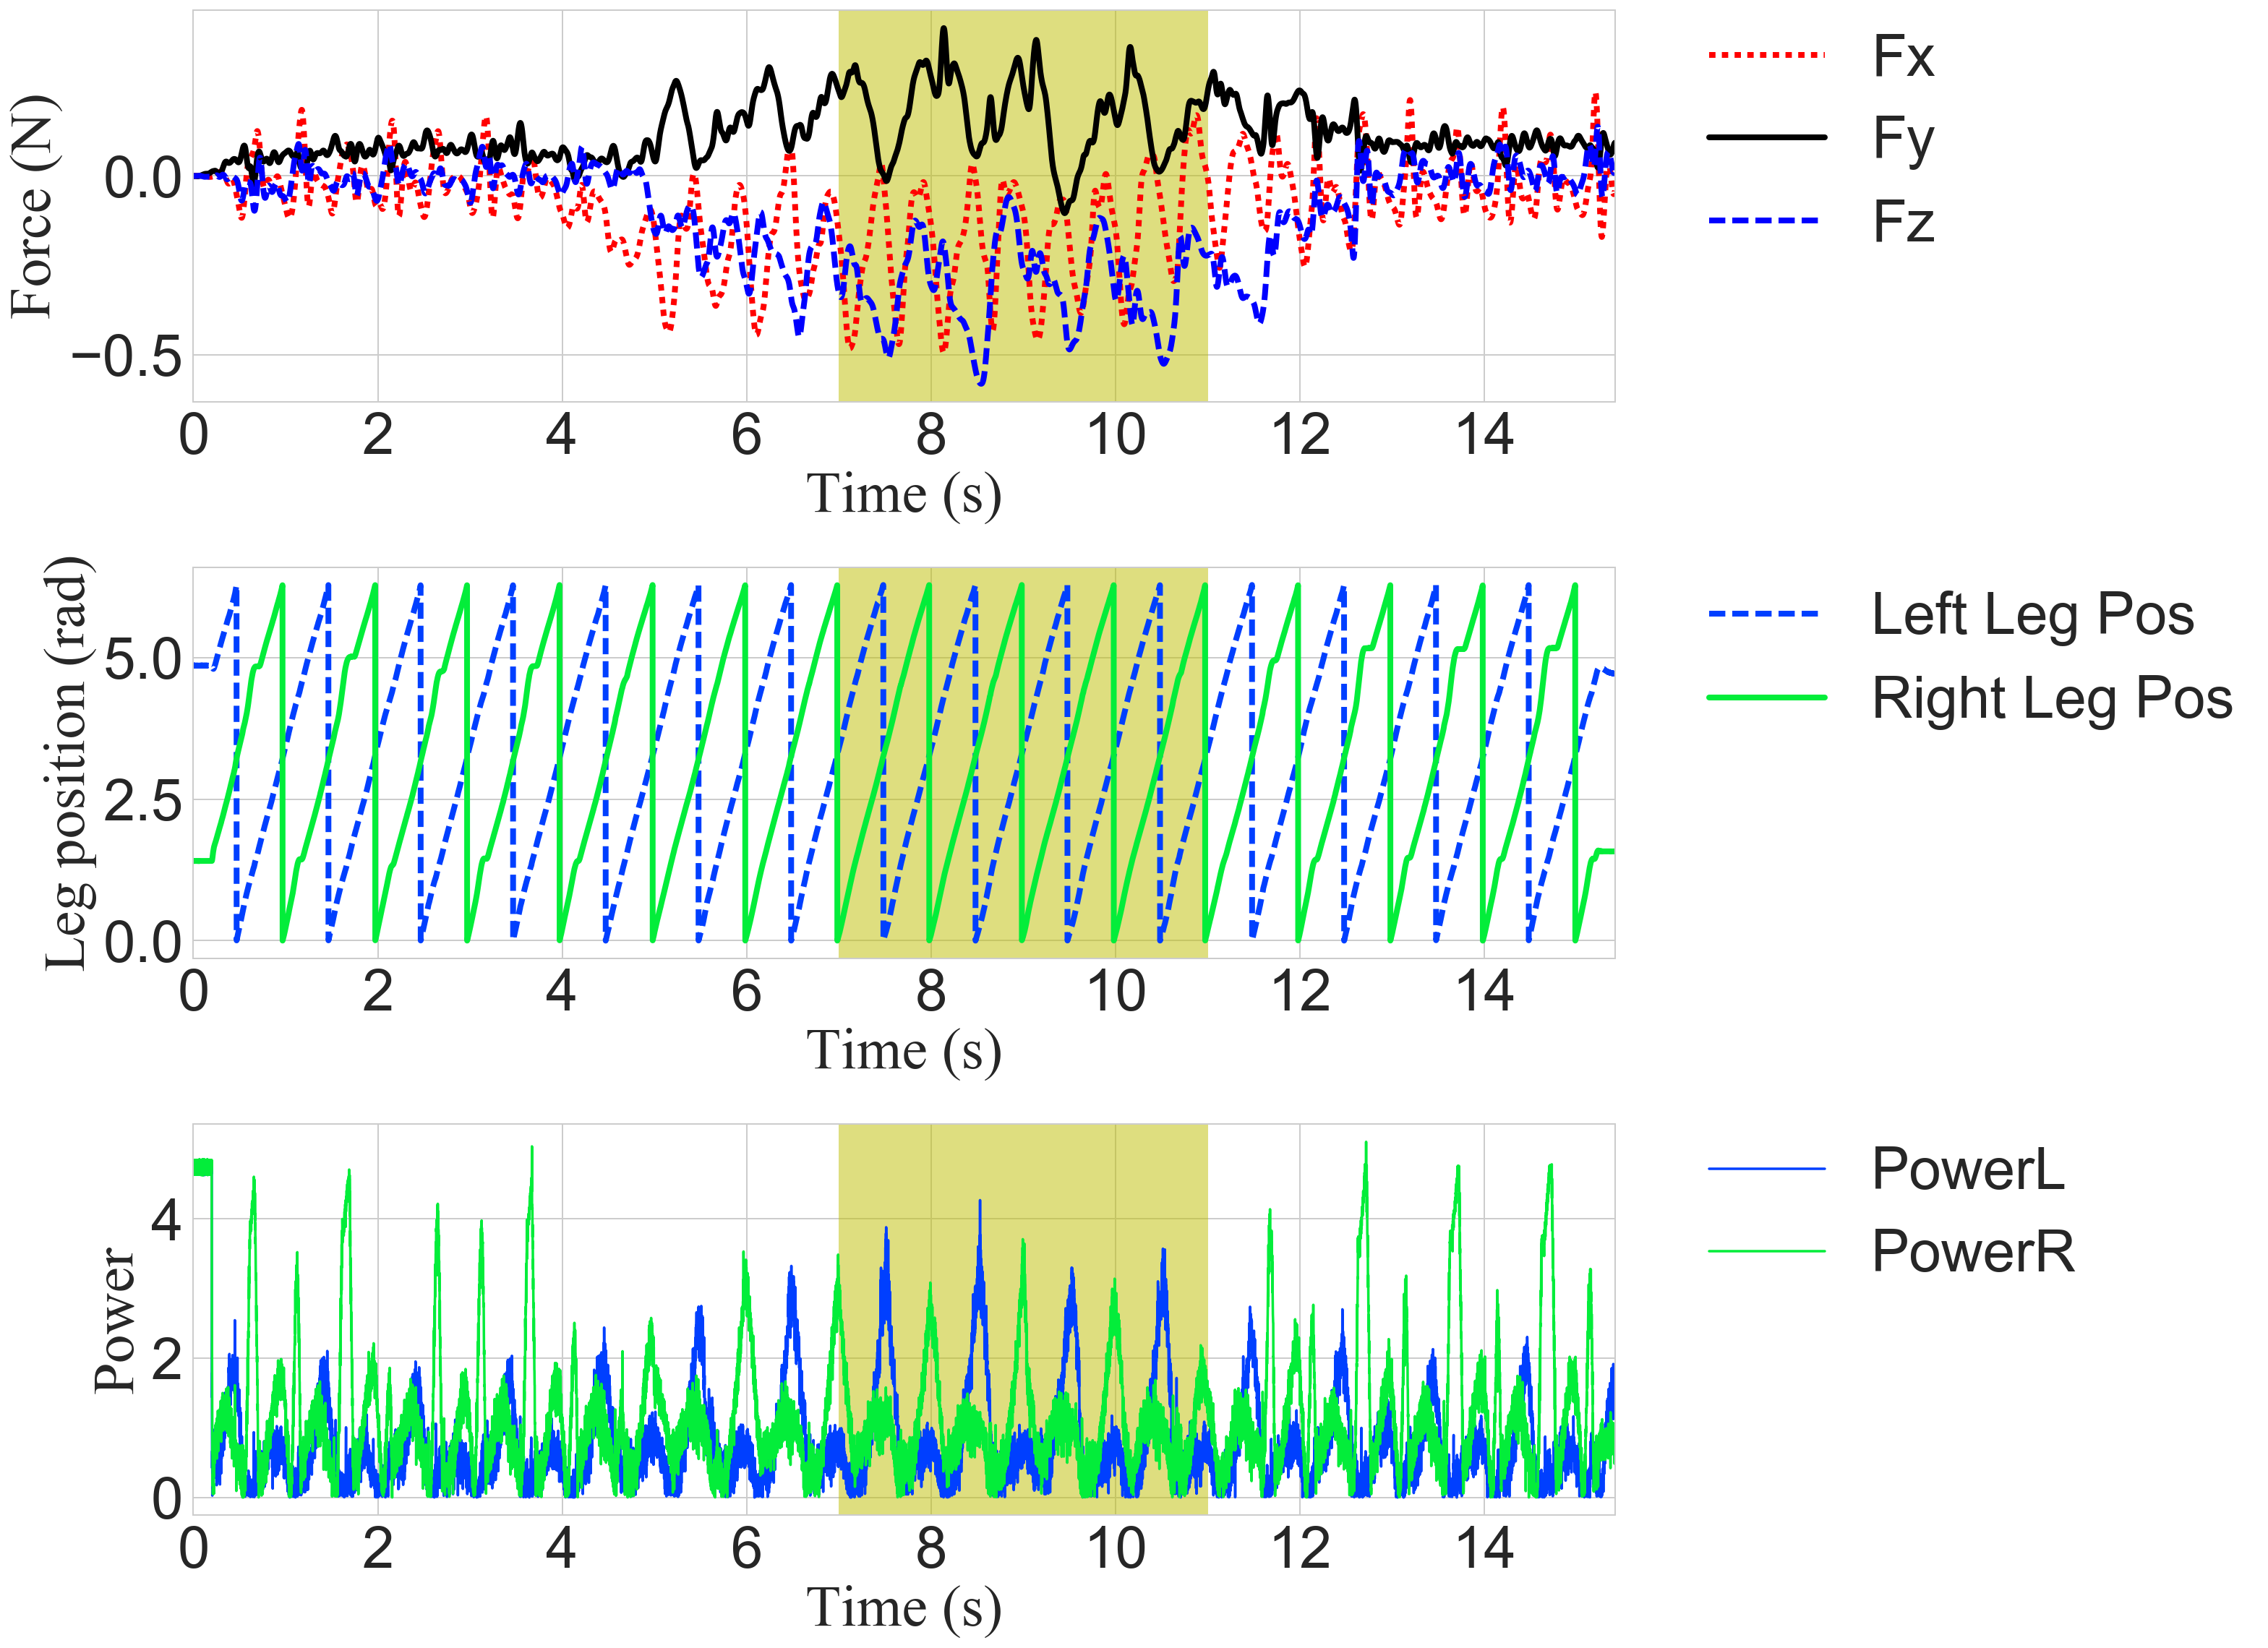

In [120]:
color_intervals = []
color_intervals.append((7.0, 11.0))
xfont = {'fontname':'Times New Roman'}
labels2 = [["x", "y", "z"],['Left', 'Right'],['Right', 'Left']]
plot_columns(
    df,
    columns=[["Fx", "Fy", "Fz"],['Left Leg Pos', 'Right Leg Pos'],['PowerL', 'PowerR']],
    color_list=['r','k','b'],
    linestyles1=[":", "-", "--"],
    linestyles2=["--", "-"],
    linestyles3=['-', '-'],
    display=True,
    save_figure=False,
    output_dir="out/",
    output_filename="visualized.png",
    color_intervals=color_intervals,
    figsize=None,)